In [44]:
import importlib
from utils import image, model

# 변경된 모듈 재로드
importlib.reload(image)
importlib.reload(model)

# 재로드된 함수 가져오기
from utils.image import load_image, visualize_parts, visualize_combined_parts
from utils.model import load_model, runs_image
import yaml

# yolo v11 segmentation

100%|██████████| 43.3M/43.3M [00:03<00:00, 12.0MB/s]



0: 640x416 1 person, 380.3ms
Speed: 3.0ms preprocess, 380.3ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 416)
세그멘테이션 결과: [{'box': [324, 98, 910, 1860], 'label': 'person', 'score': 0.9349388480186462, 'mask': array([[          0,           0,           0, ...,           0,           0,           0],
       [          0,           0,           0, ...,           0,           0,           0],
       [          0,           0,           0, ...,           0,           0,           0],
       ...,
       [          0,           0,           0, ...,           0,           0,           0],
       [          0,           0,           0, ...,           0,           0,           0],
       [          0,           0,           0, ...,           0,           0,           0]], dtype=float32)}]


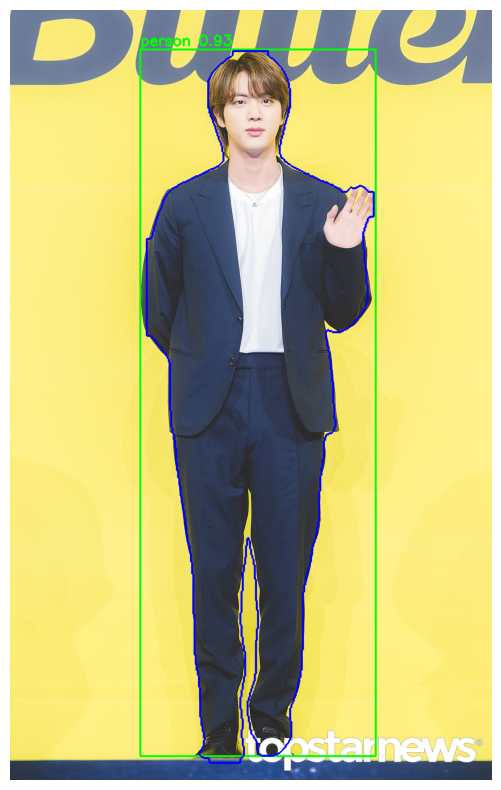

In [45]:
# 설정 파일 로드
with open("config.yaml", "r", encoding="utf-8") as file:
    config = yaml.safe_load(file)

# 경로 및 설정 값 가져오기
model_path = config['paths']['model']
image_path = config['paths']['input_dir'] + "bts_jhin.jpg"

# 모델 로드
model = load_model(model_path)
image = load_image(image_path) 
results = runs_image(model, image)
print("세그멘테이션 결과:", results)

# 세그멘테이션 결과 시각화
visualize_parts(image, results)

# yolo v11 model fine-tuning


0: 640x416 1 hair, 418.6ms
Speed: 2.0ms preprocess, 418.6ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 416)
Hair Segmentation 결과: [{'box': [488, 102, 703, 380], 'label': 'hair', 'score': 0.5673820972442627, 'mask': array([[          0,           0,           0, ...,           0,           0,           0],
       [          0,           0,           0, ...,           0,           0,           0],
       [          0,           0,           0, ...,           0,           0,           0],
       ...,
       [          0,           0,           0, ...,           0,           0,           0],
       [          0,           0,           0, ...,           0,           0,           0],
       [          0,           0,           0, ...,           0,           0,           0]], dtype=float32)}]

0: 640x416 1 bottom, 1 outerwear, 1 top, 259.1ms
Speed: 2.0ms preprocess, 259.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 416)
Clothes Detection 결과: [{'box': [388, 

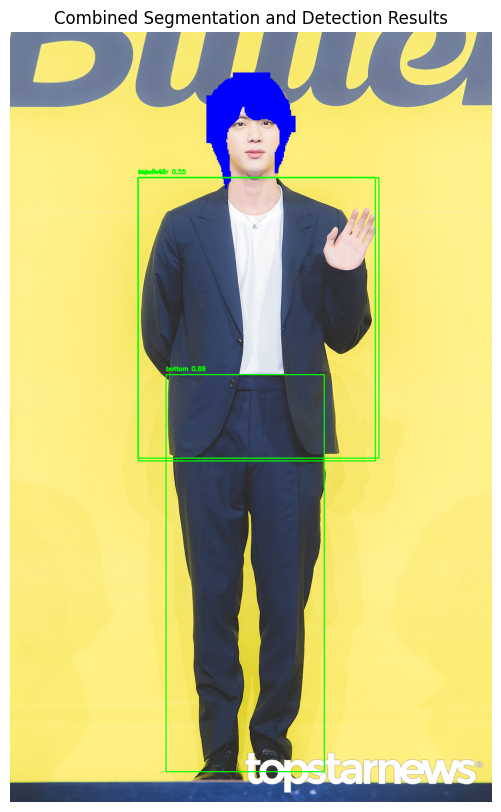

In [47]:
from ultralytics import YOLO

# 모델 로드
hair_model = YOLO("runs/segment/train/weights/best.pt")
clothes_model = YOLO("runs/detect/train/weights/best.pt")

# Hair Segmentation 결과 추론
hair_results = runs_image(hair_model, image)
print("Hair Segmentation 결과:", hair_results)

# Clothes Detection 결과 추론
clothes_results = runs_image(clothes_model, image)
print("Clothes Detection 결과:", clothes_results)

# 두 결과를 합쳐 시각화
visualize_combined_parts(image, hair_results, clothes_results)